In [3]:
# import necessary packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
plt.style.use('default')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# read the csv using panda
df_cred = pd.read_csv("BankChurners.csv")
# let's check the shape and the first 5 rows of the data
print(df_cred.shape)
df_cred.head()

(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
# Drop columns that are unneccessary
# Clientnum and the last two Naive Bayes columns is not needed
df_cred.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
             axis=1, inplace=True)

df_cred.shape

(10127, 20)

In [6]:
# List of columns
print(df_cred.columns)
print("")

# Let's see if there is any missing values
print(df_cred.info())

# Let's see the statistics for numerical values
display(df_cred.describe())

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Visualise the frequency of each categorical features


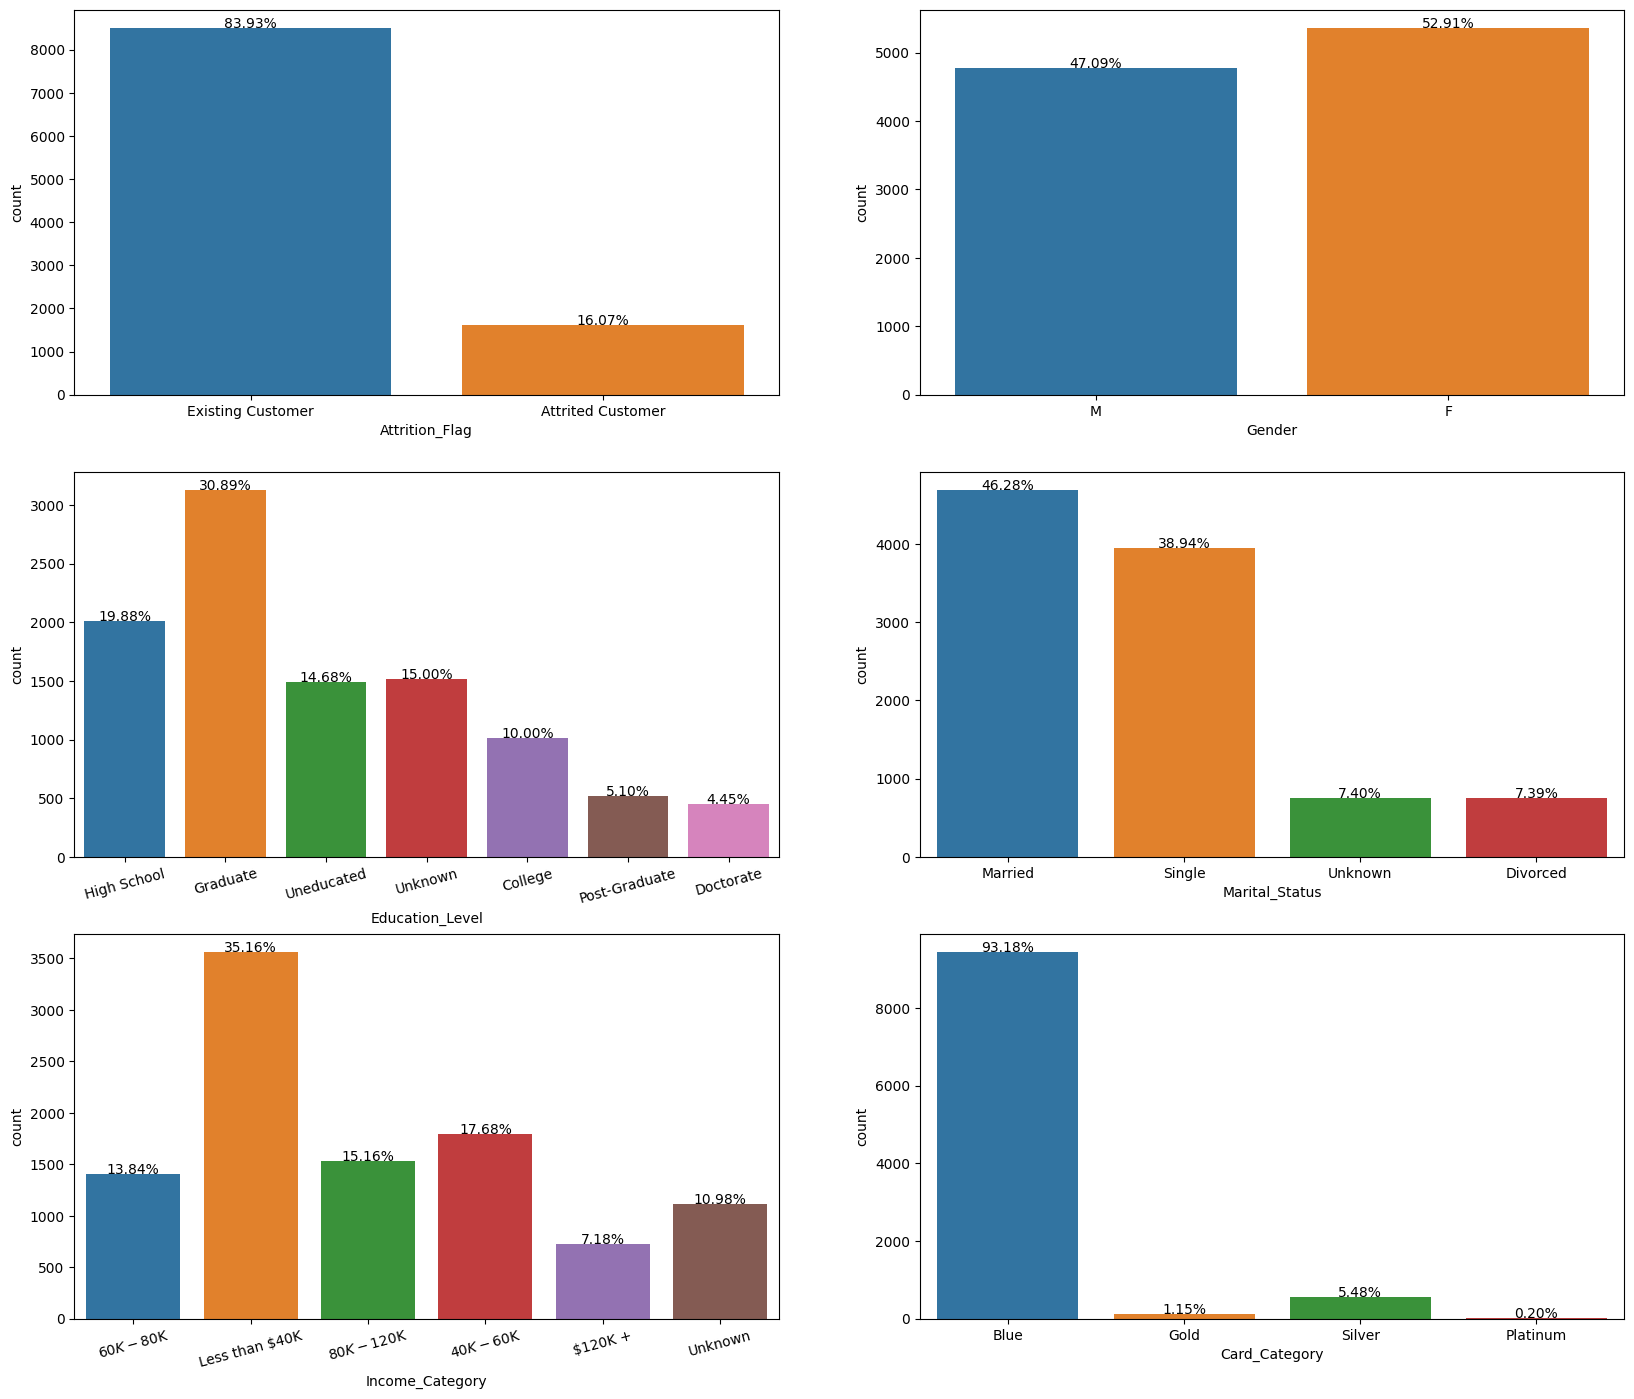

In [7]:
# We want to see the frequency and unique features of all categorical variable in the data by plotting graph
def pltCountplot(category):
    
    fig, axis = plt.subplots(3, 2, figsize=(20,17))  # graph 3 by 2

    index = 0
    for i in range(3):
        for j in range(2):
            
            ax = sns.countplot(category[index], data=df_cred, ax=axis[i][j])
            # because the x-label of edu and income category is quite long, so we need to rotate it a bit for visually pleasing
            if category[index] in ['Education_Level', 'Income_Category']:  
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(df_cred)*100),
                        ha="center") 
            index += 1
            
            
category = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
pltCountplot(category)

**Observations**

1.   The dataset has no missing values which is good and there are 20 features we are currently working on before applying some feature engineering on them which we will explore later.
2.   We can see the dataset is unbalanced where the number of customer attrited is 67.66% lower than existing.
3.   The gender of the customer is quite balanced.
4.   Most of the customer holds blue card category and have an income less than $40K.





Visualise the features frequency of customer who attrited between the categorical features

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


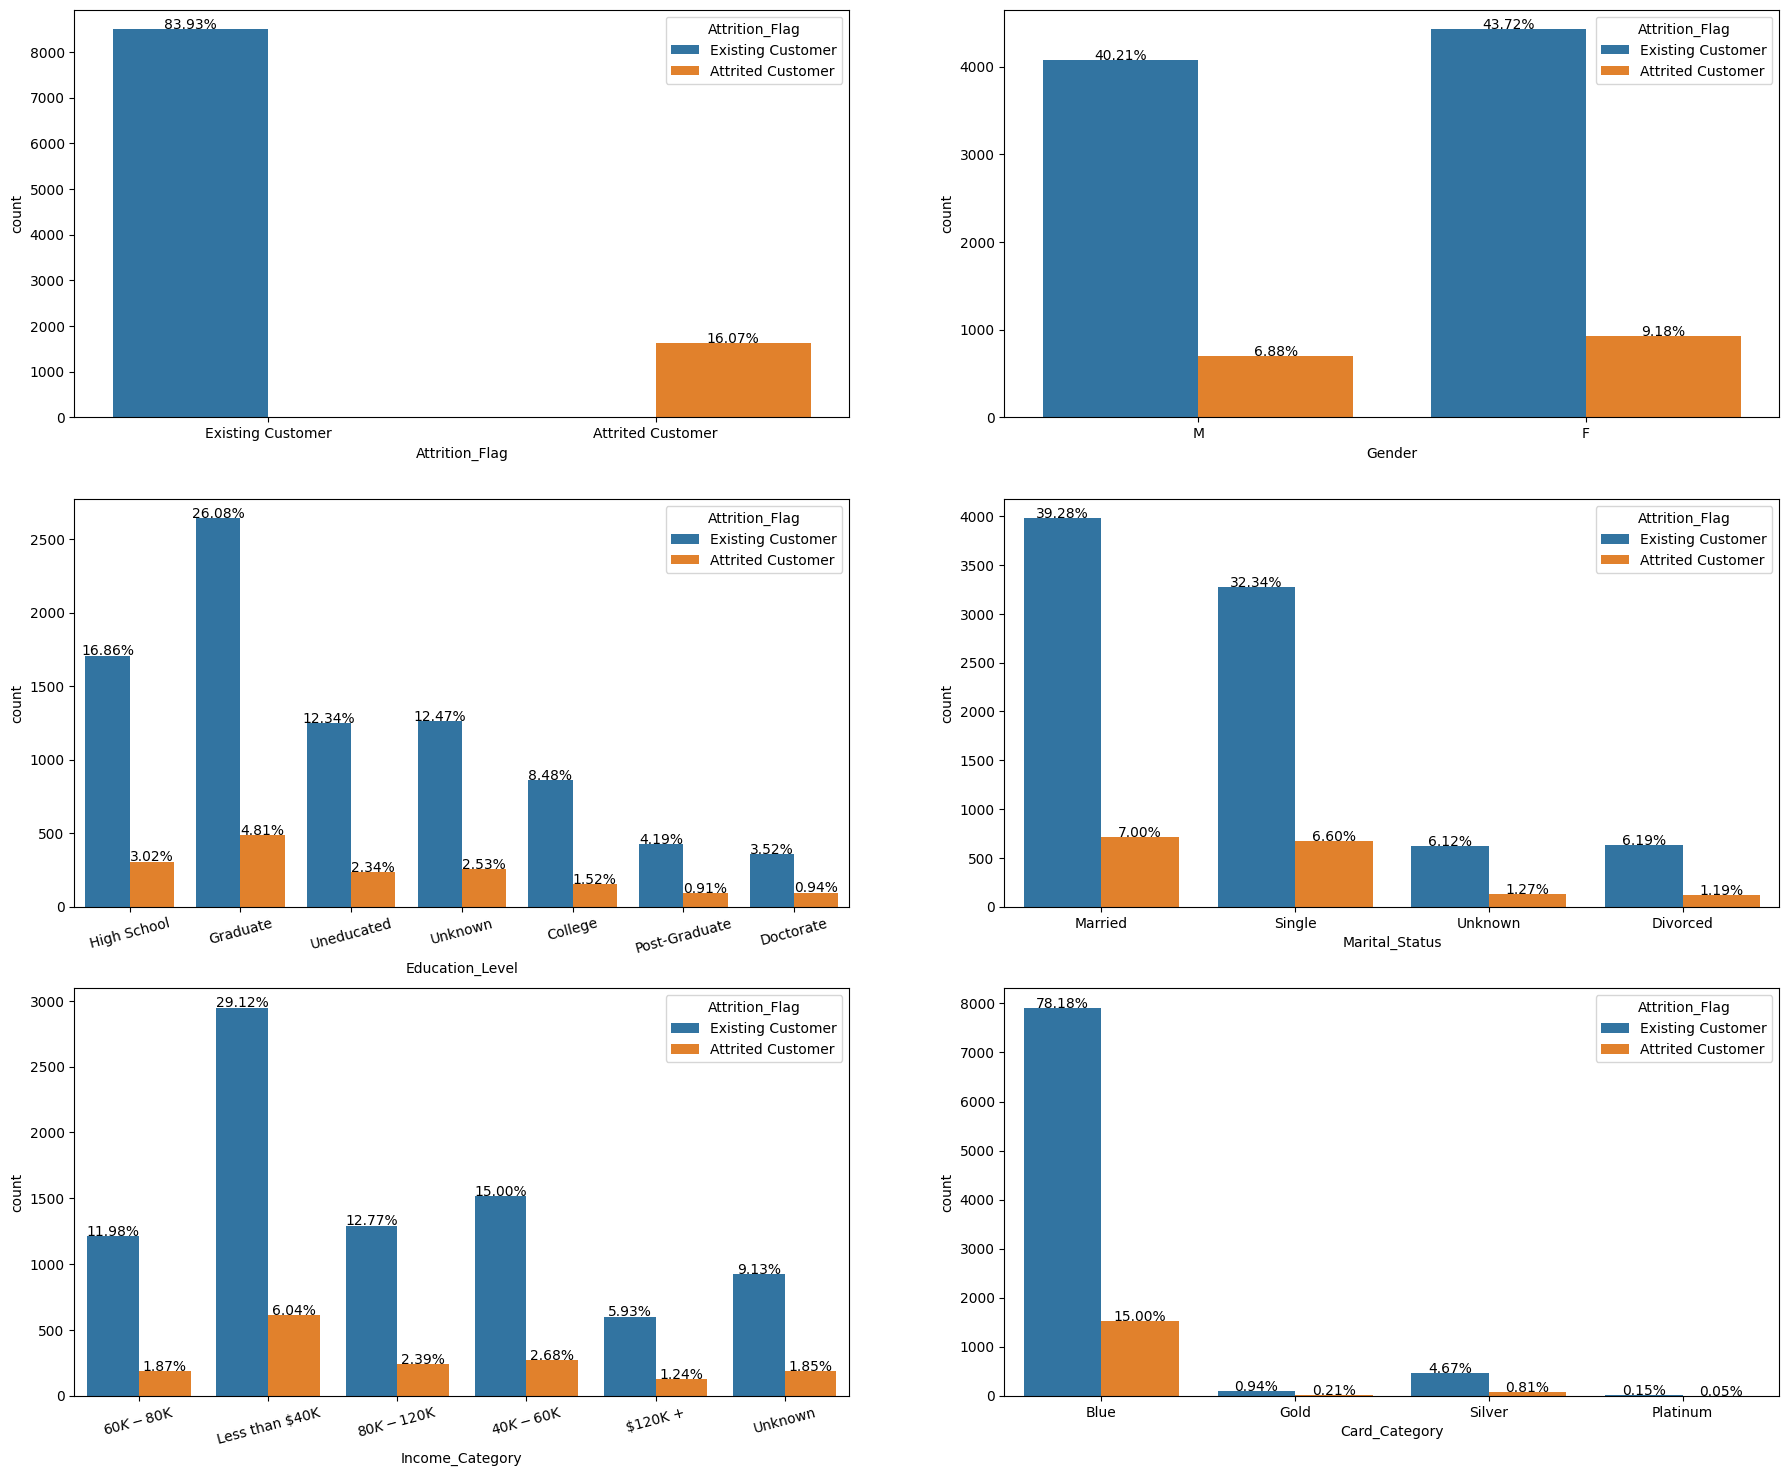

In [8]:
#Visualise the features frequency of customer who attrited between the categorical features
def pltCountplot_attrited(category, attrition_flag):
    
    fig, axis = plt.subplots(3, 2, figsize=(22,18))  # graph 3 by 2
    
    index = 0
    for i in range(3):
        for j in range(2):
            
            ax = sns.countplot(category[index], data=df_cred, hue=attrition_flag, ax=axis[i][j])
            
            if category[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(df_cred)*100),
                        ha="center") 
            index += 1
            
            
pltCountplot_attrited(category, 'Attrition_Flag')

**Observations**
1.   We can see clearly here that attrited customer is significantly less than the existing customer on all the categorical features.
2.   For the education level, the ratio of customer who attrited is roughly the same from high school up until college level. And, slowly decreasing in ratio from postgraduate to doctorate level.
3.   Ratio of attrited customer in the '60K-80K' income category, is 6.41 where it is higher than the rest income range (exclude Unknown).
These are observations we can see within the respective category only.

Now, let's see the features correlation between the numerical features

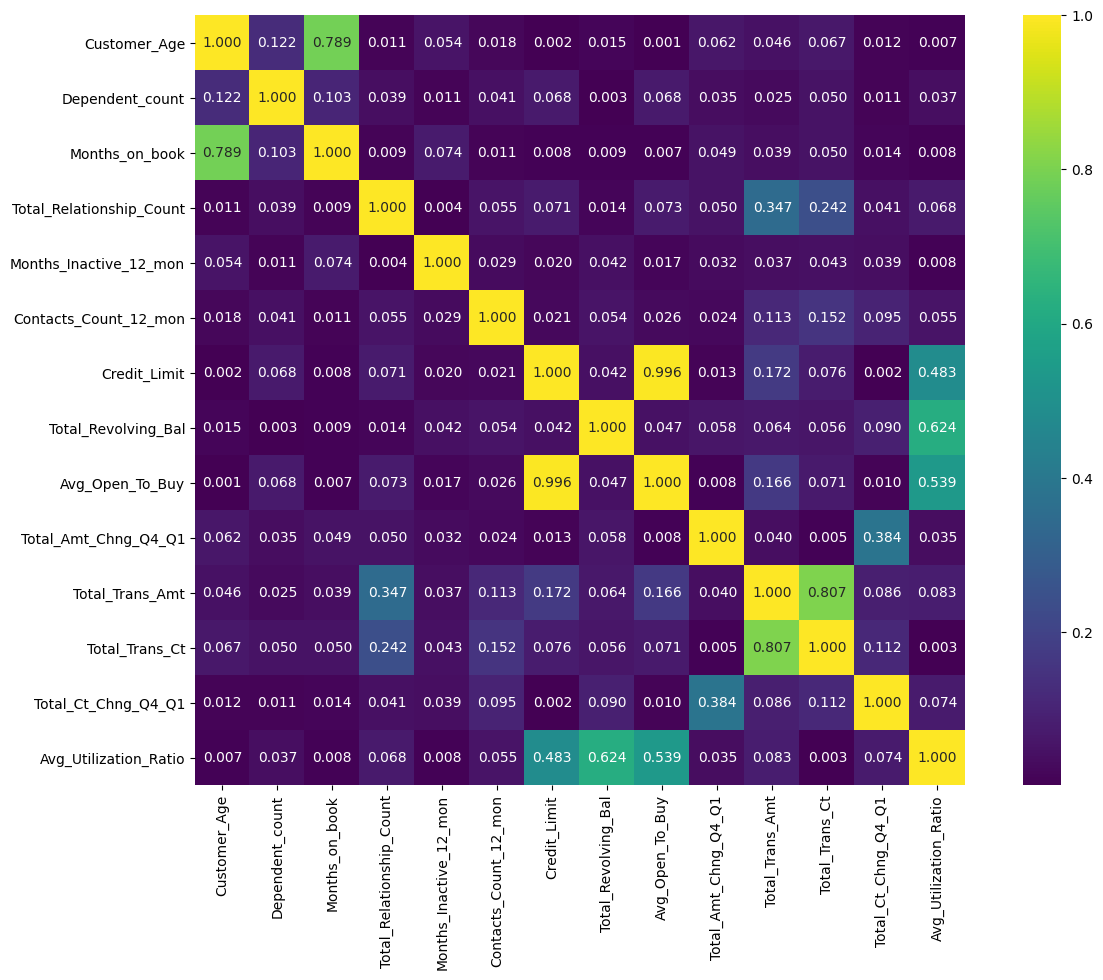

In [9]:
numerical = ['Customer_Age','Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
             'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
             'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


corr_data = df_cred.loc[:, numerical].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='viridis',square=True)
plt.show()

Observations
There are 8 numerical features who correlated above 0.5, which are:-
1.   Average Open To Buy (Credit Line) and Credit Limit (on the card) = 0.996, high positive correlation.
2.   Total Transaction Amount and Total Transaction Count = 0.807, high positive correlation.
3.   Months on book and Customer age = 0.789, positive correlation.
4.   Total revolving balance and Average Utilization Ratio = 0.624, slightly positive correlation.


# **Feature Engineering**


**Feature/ Data Encoding**

For the 6 categorical features, I have divided it into 2 sub-categories which are Nominal and Ordinal. Nominal categories will be using dummy function for non-binary and map function for binary categorical. Whereas, Ordinal will be mapped to their respective level according to their respective category.

Nominal: Attrition_Flag, Gender, and Marital_Status
Ordinal: Education_Level, Income_Category, and Card_Category

Binary categorical (Nominal)

In [10]:

# create new df
df_cred_updated = pd.DataFrame()

# Target variable
# Customer whom attrited will be replaced to 1, else 0
df_cred_updated["Attrit"] = df_cred.Attrition_Flag.map({"Attrited Customer":1, "Existing Customer":0})

# Gender
df_cred_updated["Gender"] = df_cred.Gender.map({"M":1, "F":0})

Dummy variable (Nominal)

In [11]:
dum_marital = pd.get_dummies(df_cred.Marital_Status, prefix='marital', drop_first=True)
dum_marital.head(2)

,marital_Married,marital_Single,marital_Unknown
0,1,0,0
1,0,1,0


Ordinal Categorical

In [12]:
# ordinal -- ordinal variable because it has natural ordering

df_cred_updated['Education_Level'] = df_cred.Education_Level.map({'Uneducated':1, 'High School':2, 'College':3, 
                                                         'Graduate':4, 'Post-Graduate':5, 'Doctorate':6, 'Unknown':7})
df_cred_updated['Income_Category'] = df_cred.Income_Category.map({'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, 
                                                          '$80K - $120K':4, '$120K +':5, 'Unknown':6})
df_cred_updated['Card_Category'] = df_cred.Card_Category.map({'Blue':1, 'Silver':2, 'Gold':3, 'Platinum':4})

df_cred_updated = pd.concat([df_cred_updated, dum_marital, df_cred[numerical]], axis=1)

In [13]:
# Let's see the updated credit data in more detail
print("Shape of updated credit dataset:", df_cred_updated.shape)
print("\nList of updated columns: \n\n", df_cred_updated.columns)
display(df_cred_updated.head(5))

Shape of updated credit dataset: (10127, 22)

List of updated columns: 

 Index(['Attrit', 'Gender', 'Education_Level', 'Income_Category',
       'Card_Category', 'marital_Married', 'marital_Single', 'marital_Unknown',
       'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


,Attrit,Gender,Education_Level,Income_Category,Card_Category,marital_Married,marital_Single,marital_Unknown,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,1,2,3,1,1,0,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,0,4,1,1,0,1,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,1,4,4,1,1,0,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,0,2,1,1,0,0,1,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,1,1,3,1,1,0,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Feature Scaling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.pipeline import make_pipeline


X = df_cred_updated.drop('Attrit', axis=1)
y = df_cred_updated['Attrit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# Feature scaling -- Standard Scaler
scaler_S = StandardScaler().fit(X_train)
X_train_s = scaler_S.transform(X_train)
X_test_s = scaler_S.transform(X_test)

Decomposition (PCA)

Text(0.5, 1.0, 'PCA_StandardScaler')

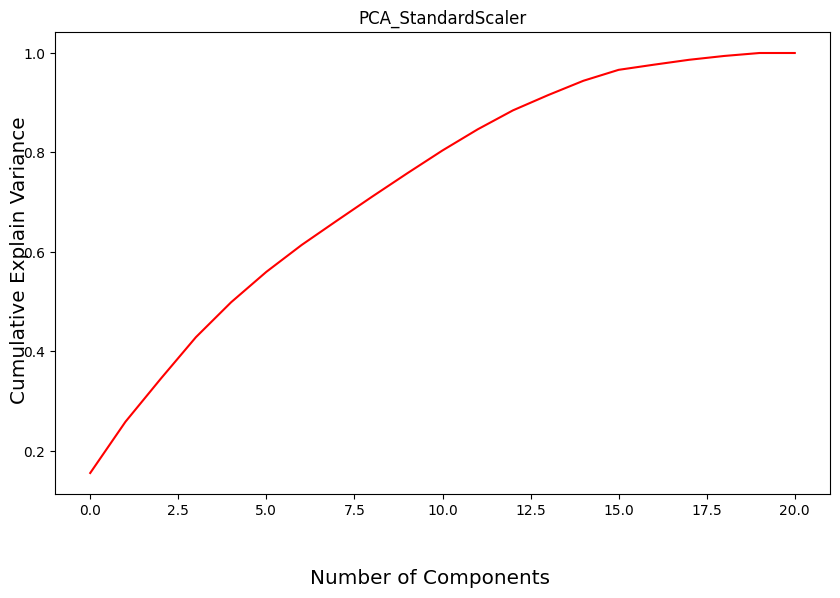

In [15]:
from sklearn.decomposition import PCA

# PCA -- Standard Scaler, MinMax, PT
pca_s = PCA().fit(X_train_s)


# # Plot the graph to see the number of components needed to explain the most data variance
fig, axs = plt.subplots(figsize=(10,6))
fig.text(0.5, -0.04, 'Number of Components', ha='center', size="x-large")
fig.text(0.08, 0.5, 'Cumulative Explain Variance', va='center', rotation='vertical', size="x-large")

axs.plot(np.cumsum(pca_s.explained_variance_ratio_), color="red")
axs.set_title("PCA_StandardScaler")


# do the PCA first so that we know which feature is most important -- plus, dont want our model to be complicated
# If we add these irrelevant features in the model, it will just make the model worst (Garbage In Garbage Out)


Observations

This curve quantifies how much of the total, 22-dimensional variance is contained within the first 𝑁 components.

We can see, with the updated dataset. The first 14 components contain approximately 90% of the variance while we need around 17 components to describe close to 100% of the variance.

In [16]:
pca1_s = PCA(n_components=14)
X_train_s_pca = pca1_s.fit_transform(X_train_s)
X_test_s_pca = pca1_s.transform(X_test_s)
# Shape
print("Original shape: ", X_train.shape)
print("\nAfter PCA & SS: ", X_train_s_pca.shape)

Original shape:  (7595, 21)

After PCA & SS:  (7595, 14)


Below is the visualization of the first 14 importance features after being scaled using Standard Scaler

We can see clearly the first component hold the most cumulative variance of features compared to the last component.

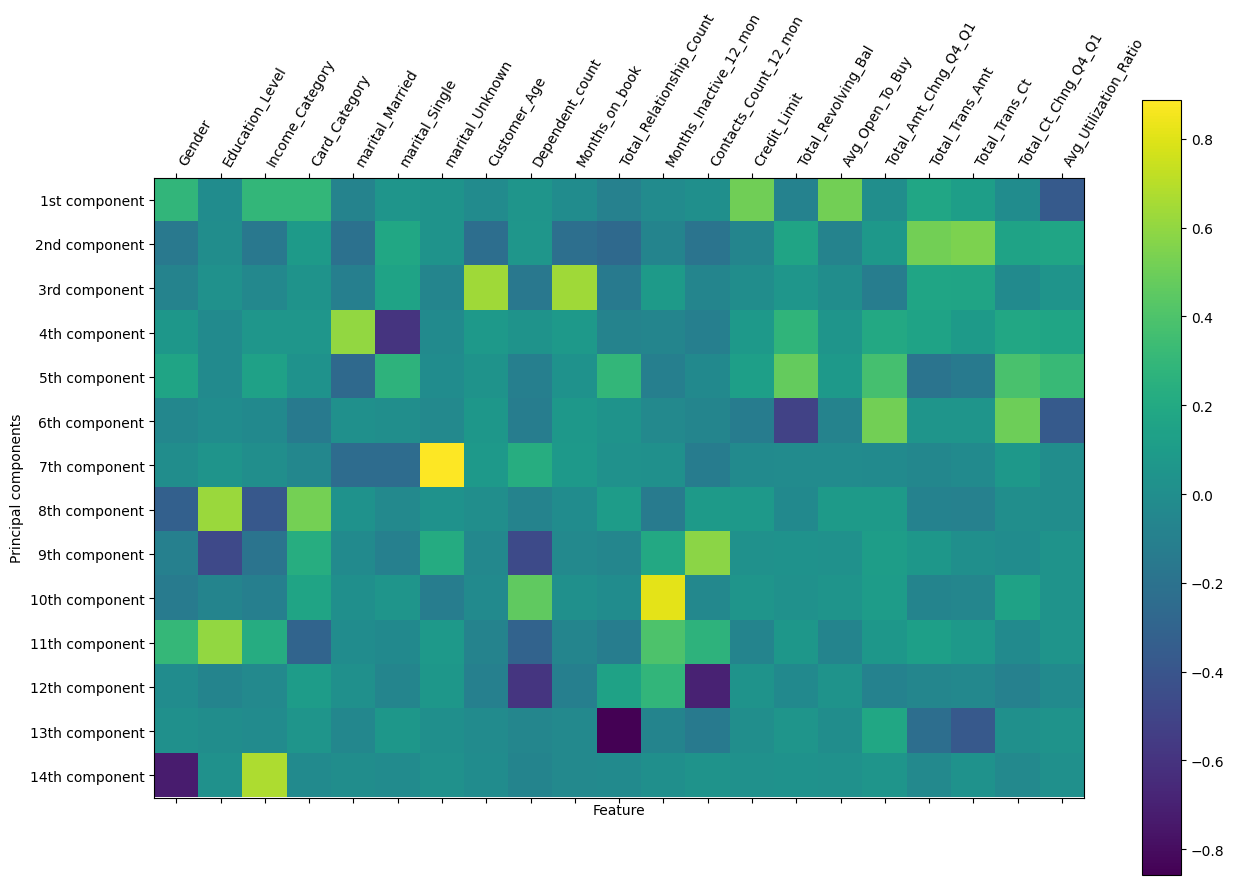

In [17]:
plt.figure(figsize=(15,10))
plt.matshow(pca1_s.components_, cmap='viridis', fignum=1)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
           ["1st component", "2nd component", "3rd component", "4th component", "5th component", 
            "6th component", "7th component", "8th component", "9th component", "10th component", 
            "11th component", "12th component", "13th component", "14th component"])
plt.colorbar()
plt.xticks(range(21), df_cred_updated.iloc[:, 1:], rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

## Modelling & Hyperparameter Tuning
## Imbalanced dataset

Since, we have an imbalanced dataset where Existing Customer:8500 and Attrited Customer:1627. We will handle it by applying KFold and over-sampling (SMOTE) method to the dataset. Our aim is to find a classifier with a good recall (i.e. we want our classifier to find as many attrited cases as it can).

##K-Fold
The general procedure is as follows:

 - Shuffle the dataset randomly.
 - Split the dataset into k groups
 - For each unique group:
   - Take the group as a hold out or test data set
   - Take the remaining groups as a training data set
   - Fit a model on the training set and evaluate it on the test set
   - Retain the evaluation score and discard the model
 - Summarize the skill of the model using the sample of model evaluation scores

##SMOTE
SMOTE can be used to create as many synthetic examples for the minority class as are required. It is used to oversample the minority class to increase it length to or close to the majority class

## Models
1. Random Forest Classifier
2. Logistic Regression
3. Support Vector Machine


###GridSearchCV is used to fine tune the hyperparameters.
**Standardizing our splits**

Making sure that our results are consistent as we try different methods. It is a little simpler to have cv=5 in all of our grid searches and cross-validations, but we will get different splits each time.

If we use cv=kf, where kf is a KFold object we can ensure that we get the same splits each time.

KFold cross-validation will be applied first before data resampling being done. It is important to avoid the data overfit our model to a specific result. Only by resampling the data repeatedly, randomness can be introduced into the dataset to make sure that there won’t be an overfitting problem.

In [18]:
# Import necessary packages

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


kf = KFold(n_splits=5)

In [19]:
# General function for all model except forest
def imba_pipe(model):
    imba_pipeline = make_pipeline(SMOTE(random_state=42), model)
    return cross_val_score(imba_pipeline, X_train_s_pca, y_train, scoring="recall", cv=kf)

# Function for forest model -- the model does not use scaled data or dimension reduction data
def imba_pipe_forest(model):
    imba_pipeline = make_pipeline(SMOTE(random_state=42), model)
    return cross_val_score(imba_pipeline, X_train, y_train, scoring="recall", cv=kf)

# Function to fit the train and test dataset to models
def imba_pipe_fit(model):
    imba_pipeline = Pipeline(steps=[('smote', SMOTE(random_state=42)), 
                                    ('model', model)
                                   ])
    return imba_pipeline

## 1. Random Forest Classifier

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction 

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Since data are not necessarily scaled when using RandomForest algorithm. Hence, we use unscaled data.

# Before GridSearchCV
rfc = RandomForestClassifier(max_depth= None, max_features=5, min_samples_split=2, criterion="gini")
rfc_recall = imba_pipe_forest(rfc)
print("Array of RFC recall score after KFold and resample: ", rfc_recall)
print("Mean of array RFC recall score: ", round(rfc_recall.mean(), 2))

Array of RFC recall score after KFold and resample:  [0.83057851 0.87391304 0.87058824 0.84166667 0.87966805]
Mean of array RFC recall score:  0.86


In [21]:
# Find the best hypertuning params -- using GridSearchCV
rfc1 = RandomForestClassifier(max_depth= None)

rfc_params = {"model__criterion":["gini", "entropy"],
              "model__min_samples_split": np.arange(2,6), 
              "model__max_features":[5, "auto", "sqrt", "log2"]
             }

rfc_grid = GridSearchCV(imba_pipe_fit(rfc1), rfc_params, cv=kf, scoring="recall")
rfc_grid.fit(X_train, y_train)

print("Best parameters for RFC: ", rfc_grid.best_params_)
print(f"\nRFC Grid best train recall score: {rfc_grid.best_score_ :.2f}")
print(f"RFC Grid best test recall score: {recall_score(y_test, rfc_grid.best_estimator_.predict(X_test)) :.2f}")

Best parameters for RFC:  {'model__criterion': 'gini', 'model__max_features': 5, 'model__min_samples_split': 3}

RFC Grid best train recall score: 0.87
RFC Grid best test recall score: 0.86


## 2. Logistic Regression

Logistic Regression is a statistical model used to determine if an independent variable has an effect on a binary dependent variable. This means that there are only two potential outcomes given an input.

In [22]:
from sklearn.linear_model import LogisticRegression

# Before GridSearchCV
logr = LogisticRegression(fit_intercept=True, solver="saga", penalty="l1", C=0.5)
logr_recall = imba_pipe(logr)
print("Array of LogReg recall score after KFold and resample: ", logr_recall)
print("Mean of array LogReg recall score: ", round(logr_recall.mean(), 2))

Array of LogReg recall score after KFold and resample:  [0.76859504 0.82608696 0.8        0.7375     0.78423237]
Mean of array LogReg recall score:  0.78


In [23]:
# Find the best hypertuning params -- using GridSearchCV
logr1 = LogisticRegression()

logr_params = {"model__solver": ["lbfgs", "sag", "saga"],
               "model__C": np.arange(0.1,2,0.1), 
               "model__class_weight": ["balanced", None]
              }

logr_grid = GridSearchCV(imba_pipe_fit(logr1), logr_params, cv=kf, scoring="recall")
logr_grid.fit(X_train_s_pca, y_train)

print("Best parameters for LogReg: ", logr_grid.best_params_)
print(f"\nLogreg Grid best train recall score: {logr_grid.best_score_ :.2f}")
print(f"Logreg Grid best test recall score: {recall_score(y_test, logr_grid.best_estimator_.predict(X_test_s_pca)) :.2f}")

Best parameters for LogReg:  {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__solver': 'lbfgs'}

Logreg Grid best train recall score: 0.78
Logreg Grid best test recall score: 0.77


## 3. Support Vector Machine (SVM)

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. 

In [24]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf", C=0.5, gamma="auto")
svc_recall = imba_pipe(svc)
print("Array of SVC recall score after KFold and resample: ", svc_recall)
print("Mean of array SVC recall score: ", round(svc_recall.mean(), 2))

Array of SVC recall score after KFold and resample:  [0.74380165 0.80869565 0.79215686 0.75416667 0.7966805 ]
Mean of array SVC recall score:  0.78


In [25]:
# Find the best hypertuning params -- using GridSearchCV
svc1 = SVC()

svc_params = {"model__C": [0.1, 0.2, 0.3, 0.4],
              "model__kernel": ["rbf", "sigmoid"],
              "model__gamma": [0.2, "scale", "auto"]
             }

svc_grid = GridSearchCV(imba_pipe_fit(svc1), svc_params, cv=kf, scoring="recall")
svc_grid.fit(X_train_s_pca, y_train) 

print("Best parameters for SVC: ", svc_grid.best_params_)
print(f"\nSVC Grid best train recall score: {svc_grid.best_score_ :.2f}")
print(f"SVC Grid best test recall score: {recall_score(y_test, svc_grid.best_estimator_.predict(X_test_s_pca)) :.2f}")

Best parameters for SVC:  {'model__C': 0.2, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

SVC Grid best train recall score: 0.81
SVC Grid best test recall score: 0.81


## Evaluation Metrics for classification

So far, we have evaluated classifiers using recall accuracy, the proportion of actual positives was identified correctly.

Simple accuracy may not often be the right goal for your particular machine learning application. For example with credit card churned or credit card fraud, false positives and false negatives might have very different real world effects for users or for organization outcomes. So, it's important to select an evaluation metric that reflects those user application or business needs.

In [26]:
# import necessary packages for classification evaluation

from sklearn.metrics import confusion_matrix, classification_report

1. Random Forest Classifier

In [27]:
rfc_pred = rfc_grid.best_estimator_.predict(X_test)
rfc_confusion = confusion_matrix(y_test, rfc_pred)
rfc_class_report = classification_report(y_test, rfc_pred, target_names=["not 1", "1"])

print("RFC confusion matrix\n", rfc_confusion)
print("______________________________________\n")
print("RFC classification report\n\n", rfc_class_report)

RFC confusion matrix
 [[2064   49]
 [  59  360]]
______________________________________

RFC classification report

               precision    recall  f1-score   support

       not 1       0.97      0.98      0.97      2113
           1       0.88      0.86      0.87       419

    accuracy                           0.96      2532
   macro avg       0.93      0.92      0.92      2532
weighted avg       0.96      0.96      0.96      2532



2. Logistic Regression

In [28]:
logr_pred = logr_grid.best_estimator_.predict(X_test_s_pca)
logr_confusion = confusion_matrix(y_test, logr_pred)
logr_class_report = classification_report(y_test, logr_pred, target_names=["not 1", "1"])

print("Logistic Regression confusion matrix\n", logr_confusion)
print("______________________________________\n")
print("Logistic Regression classification report\n\n", logr_class_report)

Logistic Regression confusion matrix
 [[1729  384]
 [  97  322]]
______________________________________

Logistic Regression classification report

               precision    recall  f1-score   support

       not 1       0.95      0.82      0.88      2113
           1       0.46      0.77      0.57       419

    accuracy                           0.81      2532
   macro avg       0.70      0.79      0.73      2532
weighted avg       0.87      0.81      0.83      2532



4. Support Vector Machine (SVM)


In [29]:
svc_pred = svc_grid.best_estimator_.predict(X_test_s_pca)

svc_confusion = confusion_matrix(y_test, svc_pred)
svc_class_report = classification_report(y_test, svc_pred, target_names=["not 1", "1"])

print("SVC confusion matrix\n", svc_confusion)
print("______________________________________\n")
print("SVC classification report\n\n", svc_class_report)

SVC confusion matrix
 [[1881  232]
 [  79  340]]
______________________________________

SVC classification report

               precision    recall  f1-score   support

       not 1       0.96      0.89      0.92      2113
           1       0.59      0.81      0.69       419

    accuracy                           0.88      2532
   macro avg       0.78      0.85      0.80      2532
weighted avg       0.90      0.88      0.88      2532



Precision-Recall Curve

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


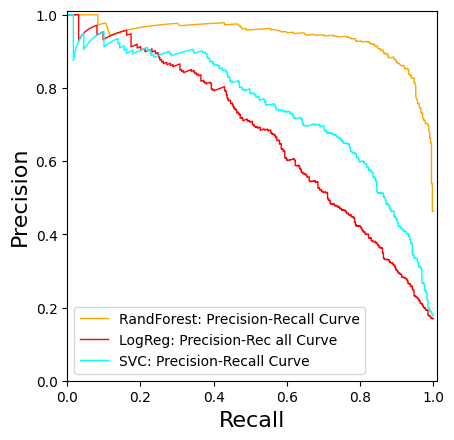

In [30]:
from sklearn.metrics import precision_recall_curve


y_proba_rfc = rfc_grid.best_estimator_.fit(X_train, y_train).predict_proba(X_test)
y_scores_logr = logr_grid.best_estimator_.fit(X_train_s_pca, y_train).decision_function(X_test_s_pca)
y_scores_svc = svc_grid.best_estimator_.fit(X_train_s_pca, y_train).decision_function(X_test_s_pca)



rfc_precision, rfc_recall, rfc_thresholds = precision_recall_curve(y_test, y_proba_rfc[:,1])
logr_precision, logr_recall, logr_thresholds = precision_recall_curve(y_test, y_scores_logr)
svc_precision, svc_recall, svc_thresholds = precision_recall_curve(y_test, y_scores_svc)


plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(rfc_recall, rfc_precision, lw=1, label='RandForest: Precision-Recall Curve', color='orange')
plt.plot(logr_recall , logr_precision, lw=1,  label='LogReg: Precision-Rec all Curve', color='red')
plt.plot(svc_recall, svc_precision, lw=1, label='SVC: Precision-Recall Curve', color='cyan')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend(loc='lower left', fontsize=10)
plt.axes().set_aspect('equal')
plt.show();


Receiver Operating Characteristic curve (ROC)

ROC curves or Receiver Operating Characteristic curves illustrate the performance of a binary classifier. It is created by plotting the true positive rate (TPR) (or recall) against the false positive rate (FPR).

ROC curves on the X-axis show a classifier's False Positive Rate so that would go from 0 to 1.0, and on the Y-axis they show a classifier's True Positive Rate so that will also go from 0 to 1.0.

ROC curves are very help with understanding the balance between true-positive rate and false positive rate.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


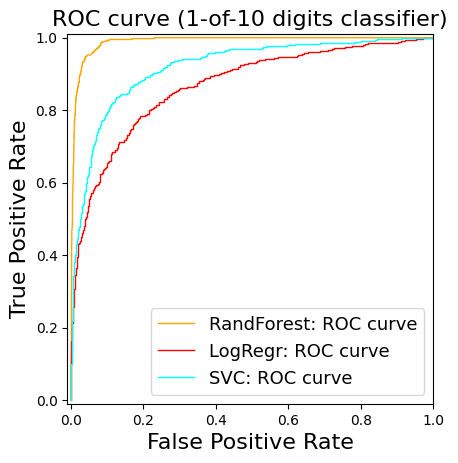

In [31]:
# import necessary packages
from sklearn.metrics import roc_curve, auc, roc_auc_score


fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_proba_rfc[:,1])
fpr_logr, tpr_logr, _ = roc_curve(y_test, y_scores_logr)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_scores_svc)


plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rfc, tpr_rfc, lw=1, label='RandForest: ROC curve', color='orange')
plt.plot(fpr_logr, tpr_logr, lw=1, label='LogRegr: ROC curve', color='red')
plt.plot(fpr_svc, tpr_svc, lw=1, label='SVC: ROC curve', color='cyan')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.axes().set_aspect('equal')
plt.show();

AUC

In [32]:
# AUC

print(f"AUC score for Random Forest {auc(fpr_rfc, tpr_rfc) :.2f}")
print(f"AUC score for LogReg {auc(fpr_logr, tpr_logr) :.2f}")
print(f"AUC score for SVC Non-linear {auc(fpr_svc, tpr_svc) :.2f}")

AUC score for Random Forest 0.99
AUC score for LogReg 0.87
AUC score for SVC Non-linear 0.92


Random Forest has the best model compared to the other with all metrics score (precision, recall, f1, accuracy) has shown at least 85% accuracy. 